# Alzheimers Disease Prediction


# Welcome to Team 8 - FinalProject Notebook! 🧠🔍


## Overview
This interactive Jupyter notebook is designed to facilitate the exploration, analysis, and prediction of Alzheimer's disease using [OASIS-2 dataset](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers). Leveraging machine learning techniques, this project aims to enhance the early detection and diagnosis of Alzheimer's disease, offering a comprehensive approach from data loading to model evaluation..



# Table of contents:
1.   Loading the Dataset
2. Expolatory Data Analysis
  *   Data Visualization
  *   Data Preprocessing

3.   Implemented Algorithims
    *   Logisitic Regression
    *   Random Forest
    *   SVM
    *   Decision Tree

4.   Results and Models Comparison


## COLUMN DESCRIPTORS
| COL  | FULL-FORMS                                   |
|------|----------------------------------------------|
| EDUC | Years of education                           |
| SES  | Socioeconomic Status                         |
| MMSE | Mini Mental State Examination                |
| CDR  | Clinical Dementia Rating                     |
| eTIV | Estimated Total Intracranial Volume          |
| nWBV | Normalize Whole Brain Volume                 |
| ASF  | Atlas Scaling Factor                         |

# Importing Packages

In [ ]:
!pip install opendatasets
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, auc ,classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.pipeline import Pipeline
import warnings
import opendatasets as od
warnings.filterwarnings("ignore")

# Loading Data from Kaggle

In [ ]:
od.download("https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers")

Skipping, found downloaded files in "./mri-and-alzheimers" (use force=True to force download)


In [ ]:
df_cross_sectional = pd.read_csv('/content/mri-and-alzheimers/oasis_cross-sectional.csv')
df_longitudinal = pd.read_csv('/content/mri-and-alzheimers/oasis_longitudinal.csv')

### Data of Cross-Sectional


In [ ]:
df_cross_sectional.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


### Data of Longitudinal

In [ ]:
df_longitudinal.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


# Exploratory Data Analysis and Preprocessing

In [ ]:
df = df_longitudinal
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


Since all patients are diagnosed in the first visit intially and remain as such

In [ ]:
df = df.loc[df['Visit']==1] # Since all patients are diagnosed in the first visit intially and remain as such
df = df.reset_index(drop=True)
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0182,OAS2_0182_MR1,Demented,1,0,M,R,73,12,NaN,23.0,0.5,1661,0.698,1.056
146,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,F,R,66,13,2.0,30.0,0.0,1495,0.746,1.174
147,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
148,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030


### Handling Duplicates

In [ ]:
# Removing duplicates
print("Number of rows before drop duplicates:", df.shape[0])
df = df.drop_duplicates()
print("Number of rows after drop duplicates:", df.shape[0])

Number of rows before drop duplicates: 150
Number of rows after drop duplicates: 150


* Number of rows before drop duplicates: 150
* Number of rows after drop duplicates: 150


### Handling Missing Values

In [ ]:
print("Missing Values in each Column:")
df.isnull().sum()

Missing Values in each Column:


Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
df["SES"].fillna(df["SES"].median(), inplace=True)
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

## Data Visualization

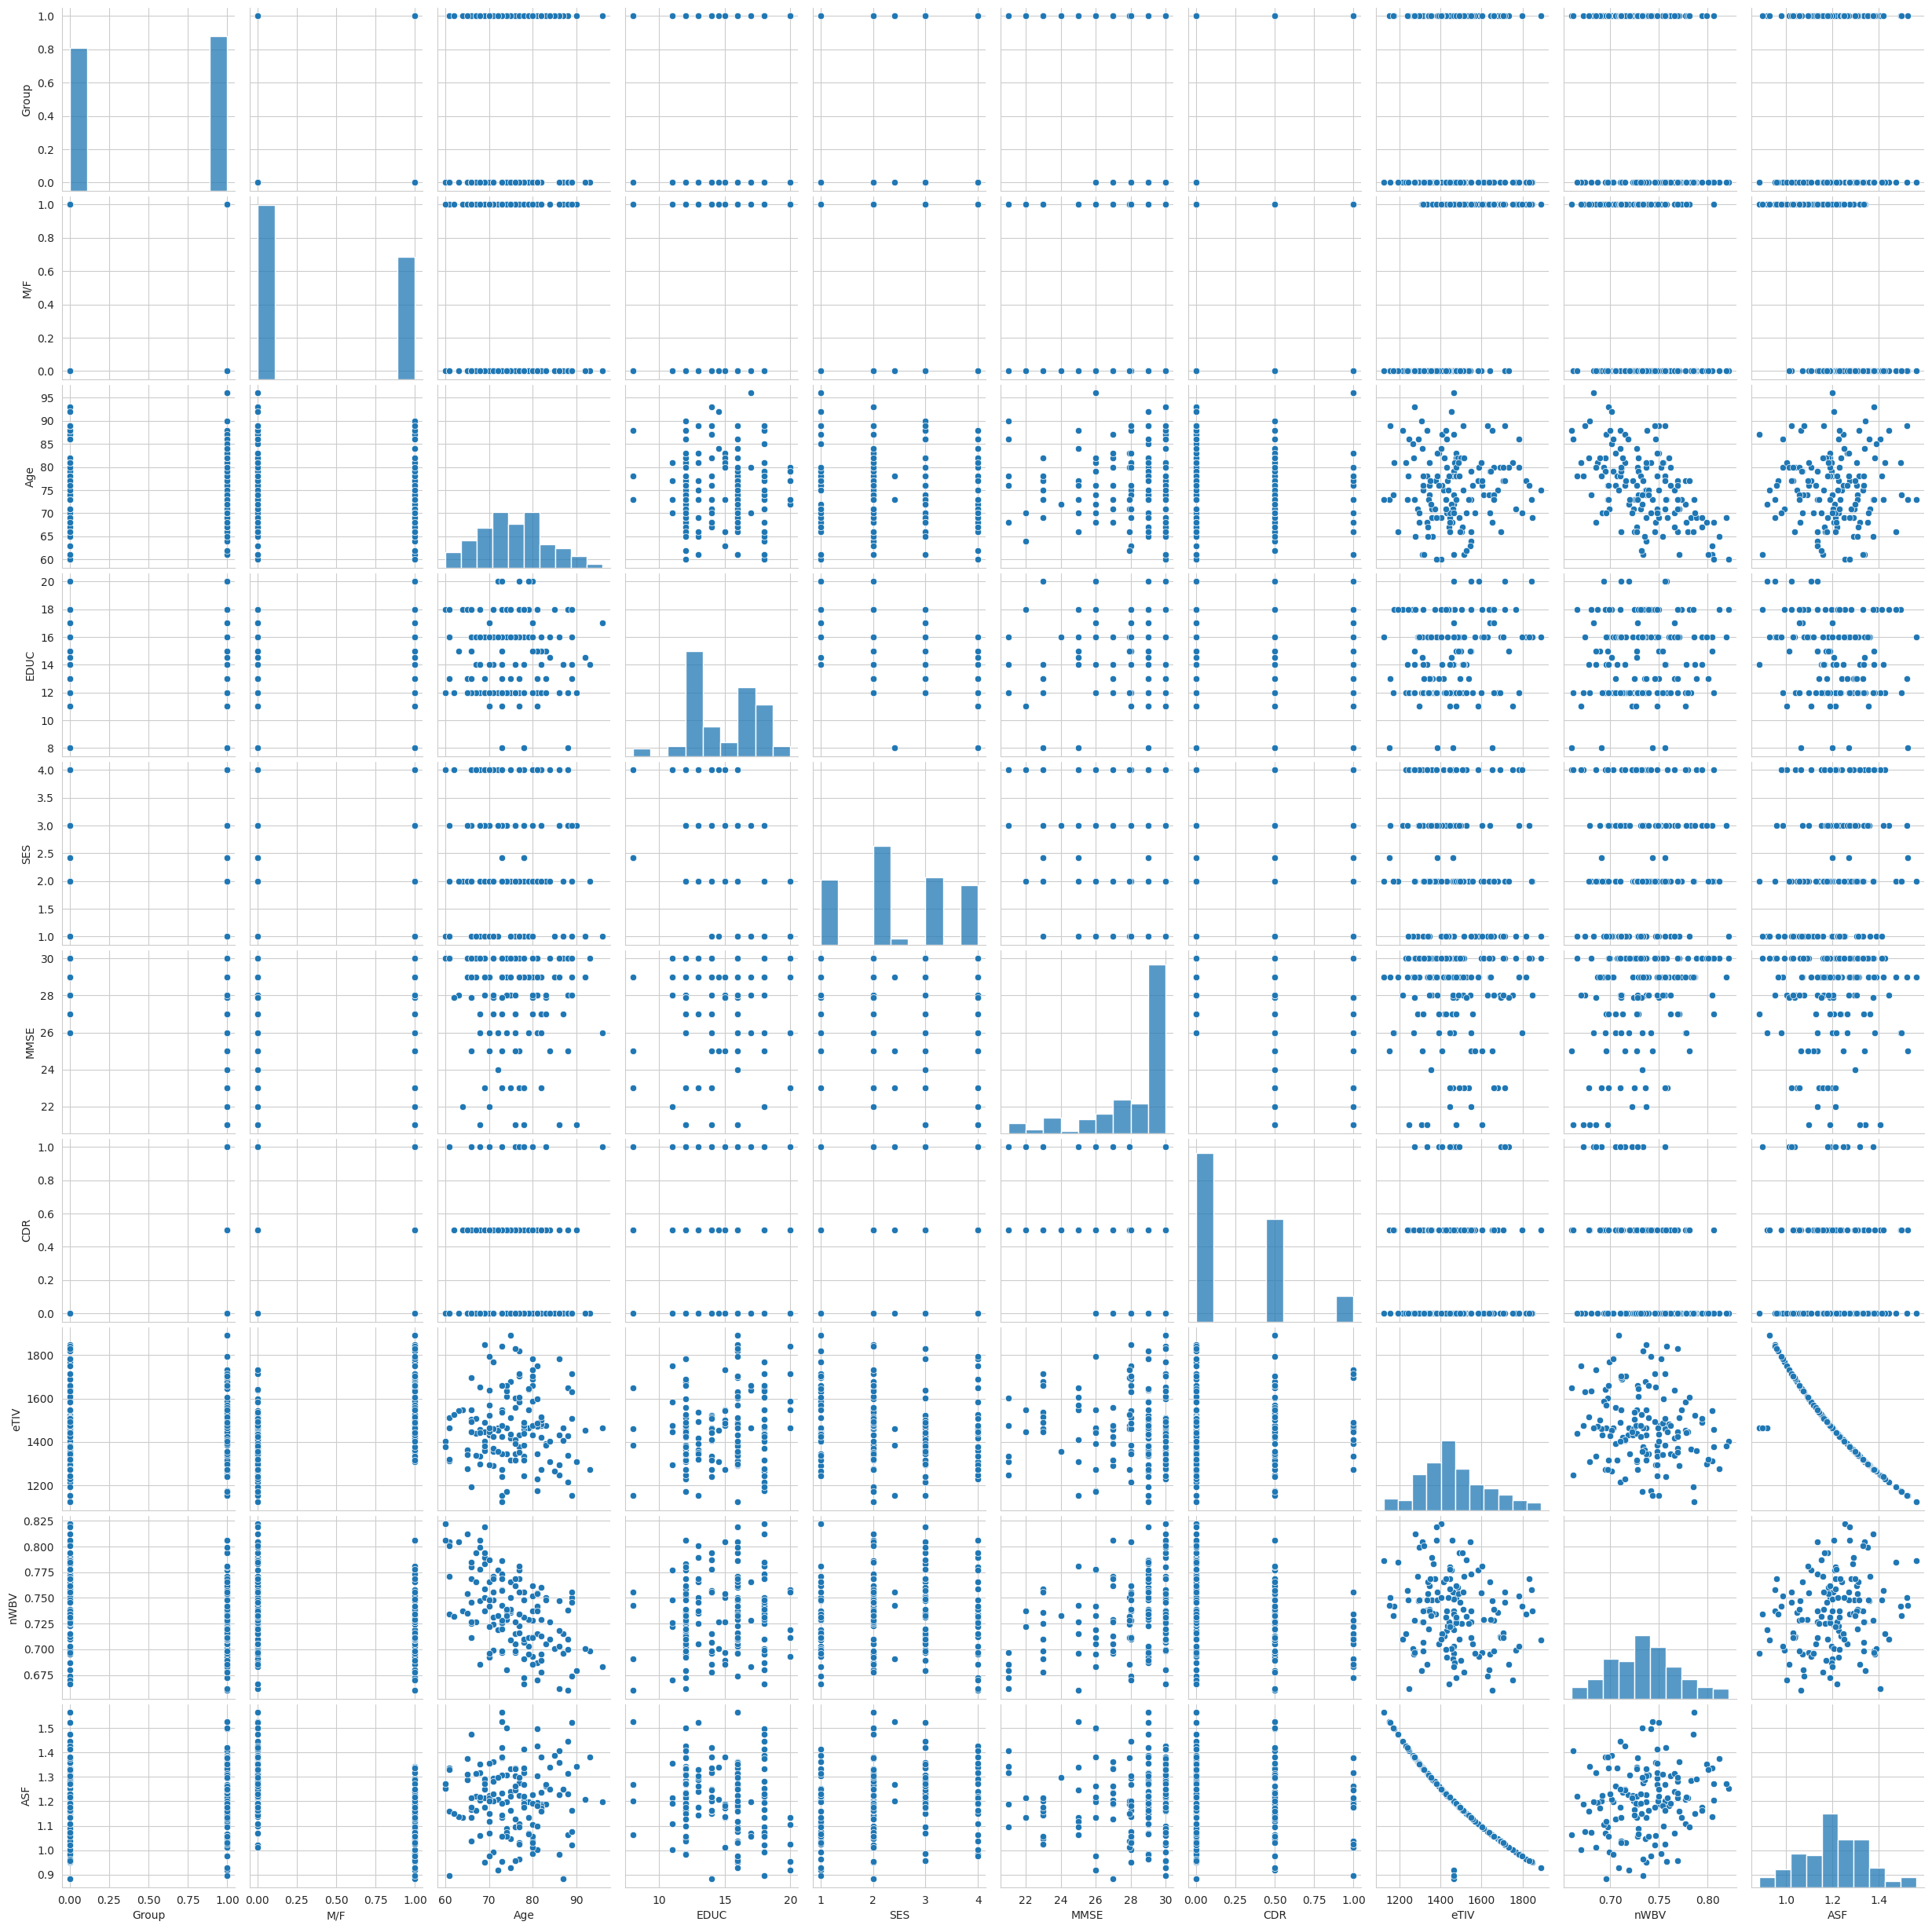

In [ ]:
sns.pairplot(df)

### Target Categorization

Group
Nondemented    72
Demented       64
Converted      14
Name: count, dtype: int64


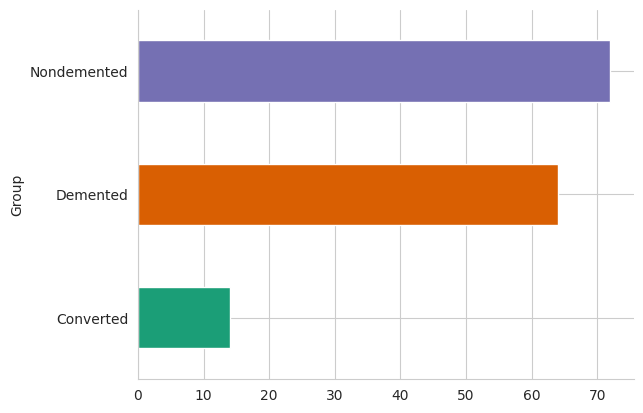

In [ ]:
print(df['Group'].value_counts())
df.groupby('Group').size().plot(kind='barh', color = sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Group
Demented       78
Nondemented    72
Name: count, dtype: int64


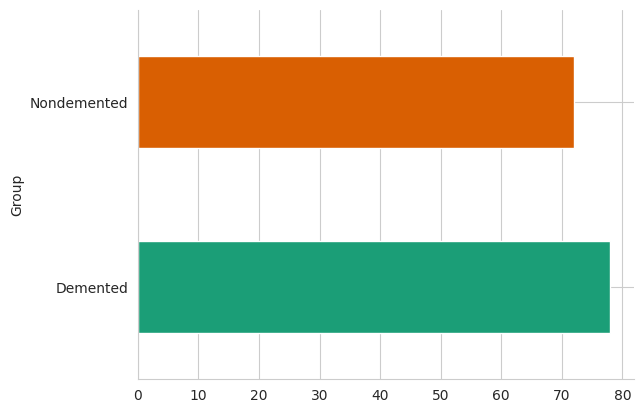

In [ ]:
#Convert Converted class to Demented class
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
print(df['Group'].value_counts())

df.groupby('Group').size().plot(kind='barh', color = sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Gender Distribution within each class

Text(0.5, 1.0, 'Gender and Demented rate')

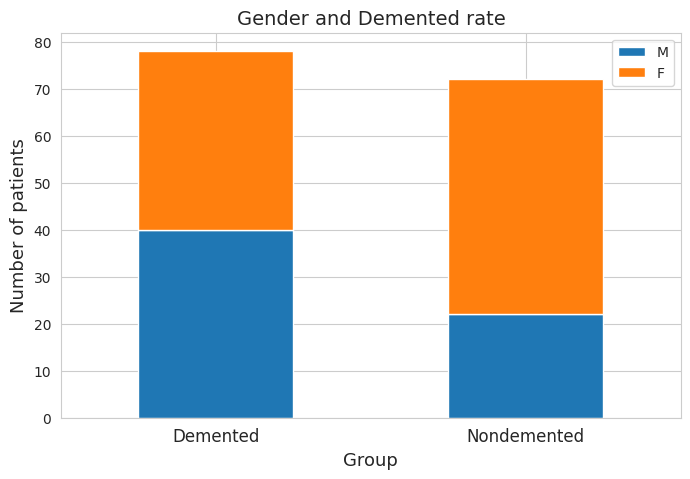

In [ ]:
Demented = df[df['Group']=='Demented']['M/F'].value_counts()
Nondemented = df[df['Group']=='Nondemented']['M/F'].value_counts()
df_bar = pd.DataFrame([Demented,Nondemented])
df_bar.index = ['Demented','Nondemented']
df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate', fontsize=14)

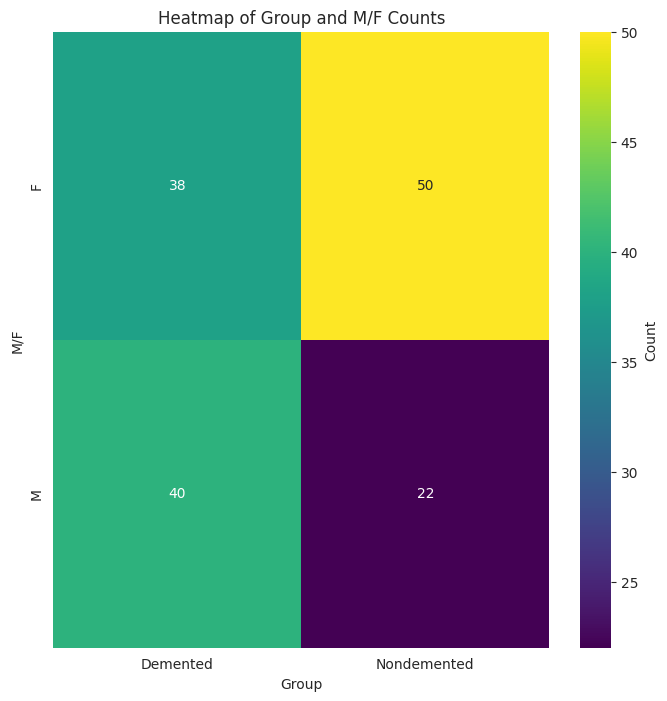

In [ ]:
# Grouping the data and creating a pivot table
df_2dhist = pd.DataFrame({
    x_label: grp['M/F'].value_counts()
    for x_label, grp in df.groupby('Group')
}).fillna(0)

plt.subplots(figsize=(8, 8))

# Create the heatmap with annotations
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Count'})
plt.xlabel('Group')
plt.ylabel('M/F')
plt.title('Heatmap of Group and M/F Counts')
plt.show()

### CDR Visualization

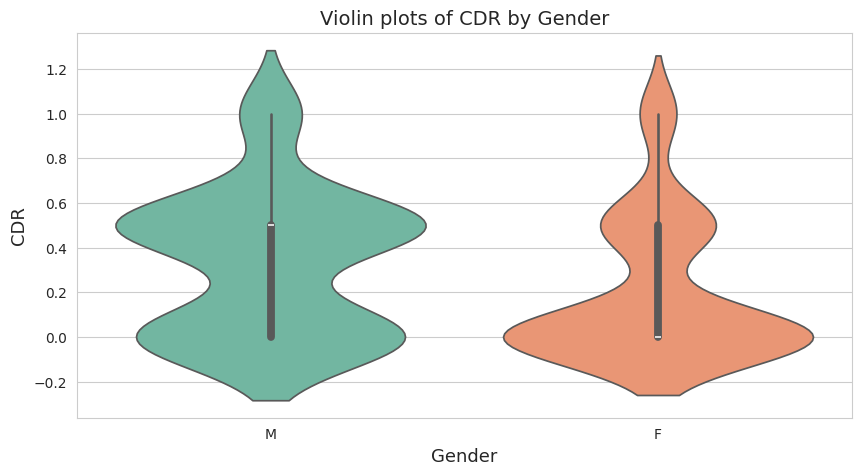

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='M/F', y='CDR', data=df,palette='Set2')
plt.title('Violin plots of CDR by Gender',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('CDR',fontsize=13)
plt.show()

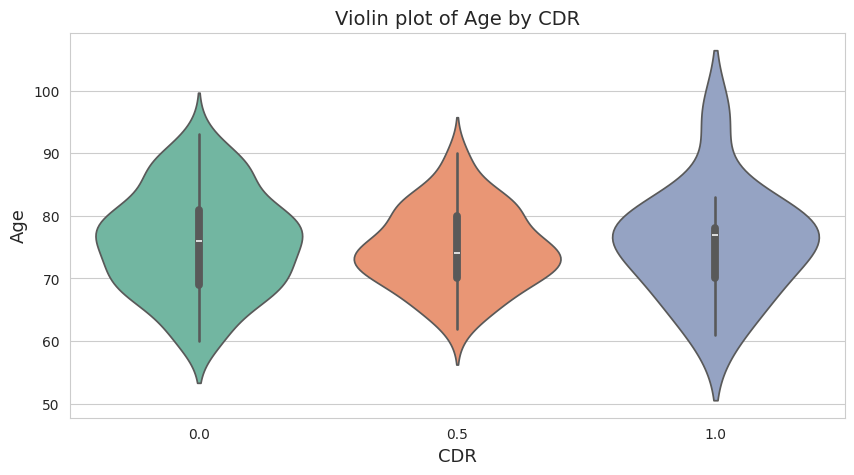

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='CDR', y='Age', data=df,palette='Set2')
plt.title('Violin plot of Age by CDR',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

### Age Distribution

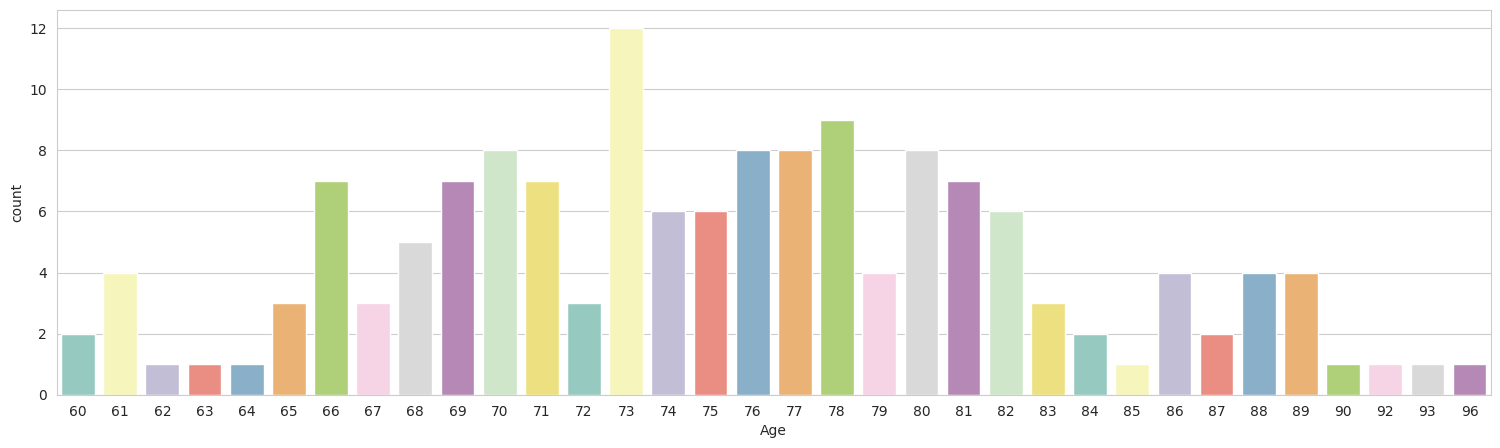

In [ ]:
ax = sns.countplot(x='Age', data=df, palette='Set3')
ax.figure.set_size_inches(18.5, 5)

### Age Distribution within each class

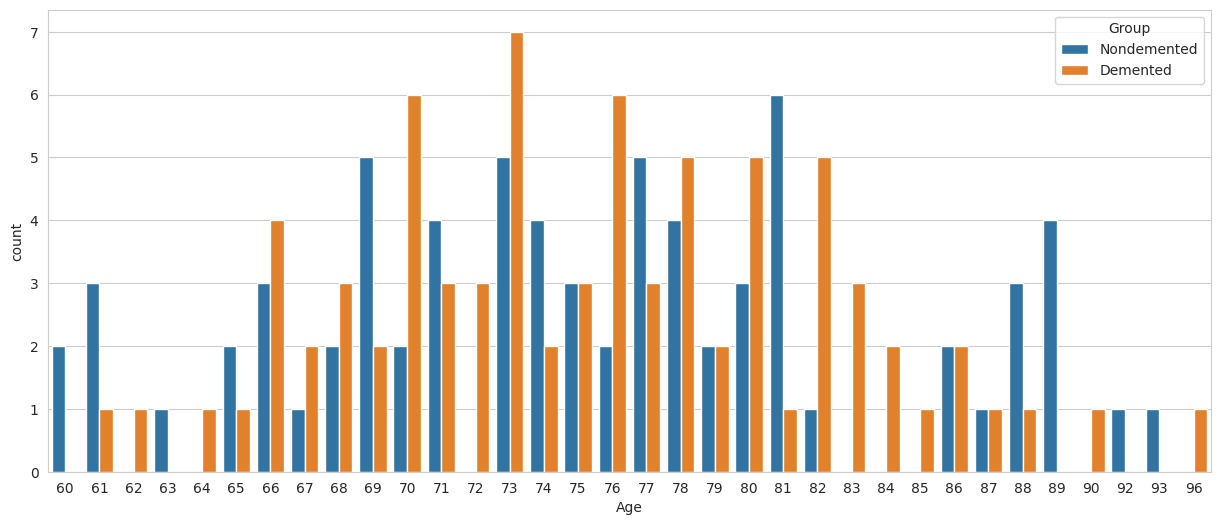

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x ='Age',hue='Group',data = df)
plt.savefig('longitudinal_by_age.png', dpi=300)

In [ ]:
facet = sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

*The Demented patient group exhibits a greater prevalence of individuals aged 70-80 compared to the nondemented patient group. We hypothesize that individuals afflicted with this condition may have a reduced life expectancy, resulting in fewer individuals aged 90 years and older.*

(15.3, 30.0)

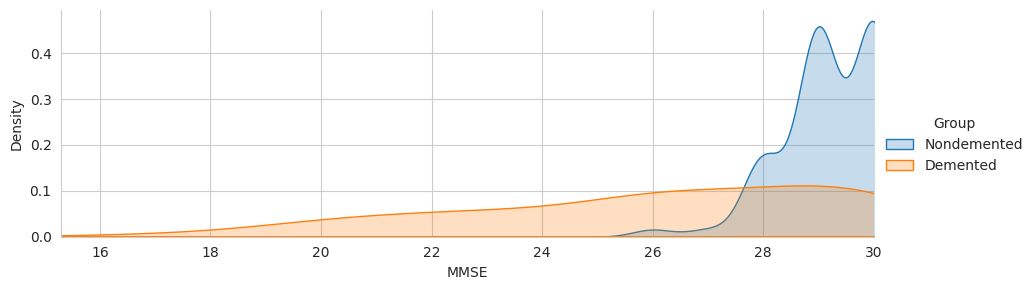

In [ ]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

*we observed a notable distinction in Mini–Mental State Examination (MMSE) scores between the Demented and Nondemented groups. The chart illustrates that individuals in the Nondemented group consistently obtained significantly higher MMSE scores compared to those in the Demented group. This discrepancy suggests a potential correlation between cognitive impairment, as assessed by the MMSE, and the presence of dementia*

### More Data Preprocessing

In [ ]:
# Labels encoding and Handling Categorical Features
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])
df['M/F']= df['M/F'].replace(['M','F'],[1,0])
df = df.drop(['Subject ID','MRI ID', 'Visit', 'Hand', 'MR Delay'], axis=1) # Drop irrelevant columns
df.head(5)


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
2,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,1,1,71,16,2.0,28.0,0.5,1357,0.748,1.293


### Handling Outliers with IQR method

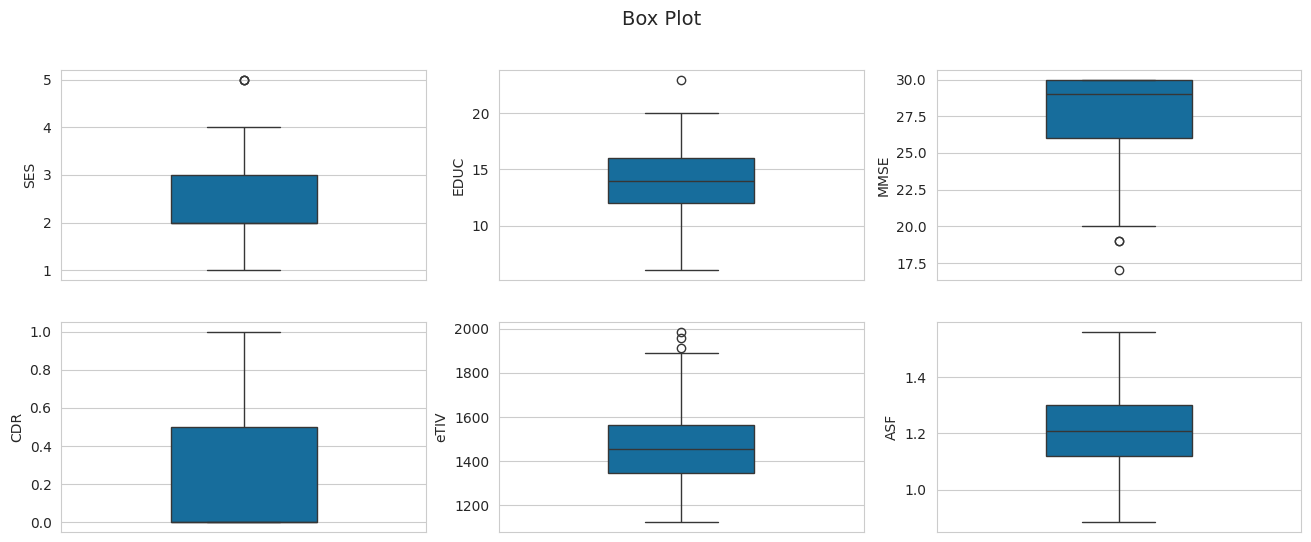

In [ ]:
#boxplots which shows the IQR(Interquartile Range )
fig, axes = plt.subplots(2,3,figsize = (16,6))
fig.suptitle("Box Plot",fontsize=14)
sns.set_style("whitegrid")
sns.boxplot(data=df['SES'], orient="v",width=0.4, palette="colorblind",ax = axes[0][0]);
sns.boxplot(data=df['EDUC'], orient="v",width=0.4, palette="colorblind",ax = axes[0][1]);
sns.boxplot(data=df['MMSE'], orient="v",width=0.4, palette="colorblind",ax = axes[0][2]);
sns.boxplot(data=df['CDR'], orient="v",width=0.4, palette="colorblind",ax = axes[1][0]);
sns.boxplot(data=df['eTIV'], orient="v",width=0.4, palette="colorblind",ax = axes[1][1]);
sns.boxplot(data=df['ASF'], orient="v",width=0.4, palette="colorblind",ax = axes[1][2]);

In [ ]:
def remove_outliers(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    clean_data = data[(data > lower_bound) & (data < upper_bound)]
    return clean_data


In [ ]:
print("Number of rows before drop outliers:", df.shape[0])
features = ['EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
for feature in features:
    df[feature]= remove_outliers(df[feature])
print("Number of rows after drop outliers:", df.shape[0])

Number of rows before drop outliers: 150
Number of rows after drop outliers: 150


In [ ]:
df.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     2
SES      3
MMSE     6
CDR      0
eTIV     3
nWBV     1
ASF      0
dtype: int64

In [ ]:
mean_EDUC = df['EDUC'].mean()
mean_SES = df['SES'].mean()
mean_MMSE = df['MMSE'].mean()
mean_eTIV = df['eTIV'].mean()
mean_nWBV = df['nWBV'].mean()

df['EDUC'].fillna(mean_EDUC, inplace=True)
df['SES'].fillna(mean_SES, inplace=True)
df['MMSE'].fillna(mean_MMSE, inplace=True)
df['eTIV'].fillna(mean_eTIV, inplace=True)
df['nWBV'].fillna(mean_nWBV, inplace=True)

df.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

### Correlation Heatmap of Features

Text(0.5, 1.0, 'Correlation Heatmap of Features')

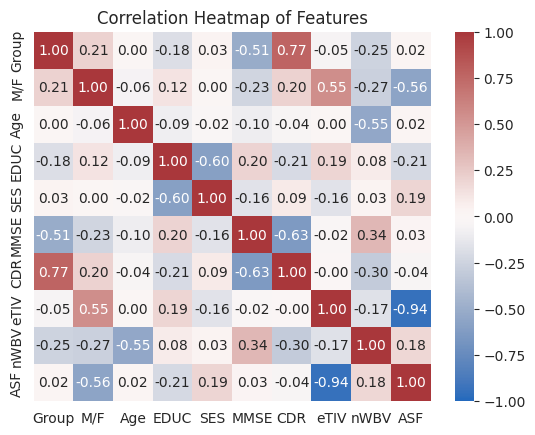

In [ ]:
corr = df.corr()

# Create a heatmap using seaborn
sns.heatmap(
    corr, cmap="vlag", annot=True,  # Display the heatmap with annotation
    fmt=".2f", annot_kws={'size': 10},  # Format annotations with two decimal places
    vmin=-1, vmax=1  # Set the color scale limits to -1 and 1
)


plt.title("Correlation Heatmap of Features")

# Data Splitting


We split the dataset into training and testing sets with 70% of the data allocated for training and 30% for testing,

In [ ]:
y = df['Group']
X = df.drop('Group',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Standandrization

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implemented Algorithms

In [ ]:
def plot_confusion_matrix(test, pred, model):
    fig, ax = plt.subplots(1,2,figsize=(15, 6))
    sns.heatmap(confusion_matrix(test, pred), annot=True, cmap='Blues',ax=ax[0])
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    ax = sns.distplot(test, color='r', label='Actual Value',hist=False)
    sns.distplot(pred, color='b', label='Predicted Value',hist=False,ax=ax)
    plt.title(f'Actual vs Predicted Value {model}')
    plt.xlabel('Outcome')
    plt.ylabel('Count')
    plt.show()
    return

In [ ]:
def plot_roc_curve(y_test, y_pred, model):
    fpr, tpr, thresholds = roc_curve(y_pred, y_test)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic (ROC) Curve For {model}')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
acc = []
precision = []
recall = []
f1 = []
models = []

## Logistic Regression

In [ ]:
# Hyperparameter tuning with GridSearchCV

grid={"C":np.logspace(-3,3,7),
      "penalty":["l1","l2"] # l1 lasso l2 ridge
    }

log_grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                            param_grid=grid,
                            cv=5,
                            scoring='accuracy',
                            n_jobs=-1)

log_grid_search.fit(X_train_scaled, y_train)


log_best_params = log_grid_search.best_params_
log_best_score = log_grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", log_best_params)
print("Best Score:", log_best_score)


Best Parameters: {'C': 1.0, 'penalty': 'l2'}
Best Score: 0.9238095238095239


In [ ]:
# Evaluate the best model on the test set
log_best_model = log_grid_search.best_estimator_
log_test_accuracy = log_best_model.score(X_test_scaled, y_test)
print("Logestic Regression Test Accuracy:", log_test_accuracy)

Logestic Regression Test Accuracy: 0.8888888888888888


In [ ]:
log_y_pred = log_best_model.predict(X_test_scaled)
log_y_proba = log_best_model.predict_proba(X_test_scaled)
report = classification_report(y_test, log_y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.74      0.85        19

    accuracy                           0.89        45
   macro avg       0.92      0.87      0.88        45
weighted avg       0.91      0.89      0.89        45



In [ ]:
# Calculate accuracy
log_accuracy = accuracy_score(y_test, log_y_pred)

# Calculate precision
log_precision = precision_score(y_test, log_y_pred)

# Calculate recall (sensitivity)
log_recall = recall_score(y_test, log_y_pred)

# Calculate F1-score
log_f1 = f1_score(y_test, log_y_pred)

acc.append(log_accuracy)
precision.append(log_precision)
recall.append(log_recall)
f1.append(log_f1)

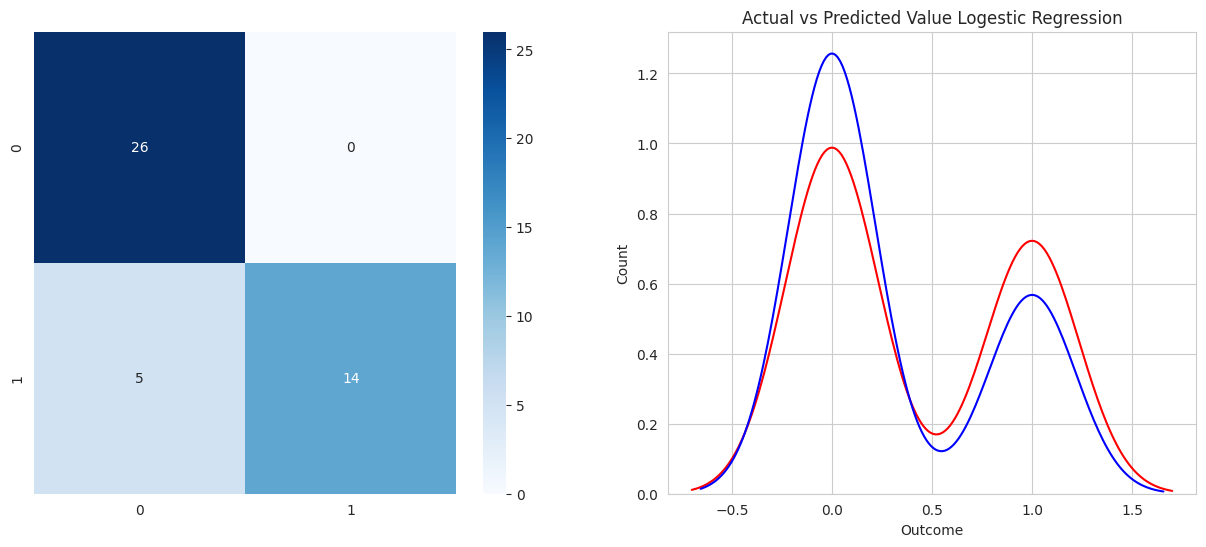

In [ ]:
plot_confusion_matrix(y_test, log_y_pred, 'Logestic Regression')

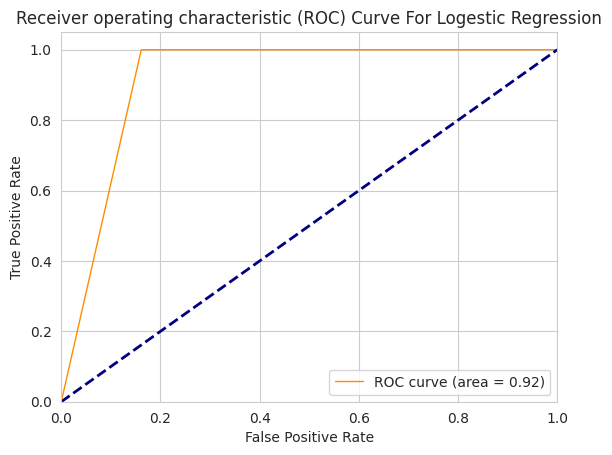

In [ ]:
plot_roc_curve(y_test, log_y_pred, 'Logestic Regression')

## Random Forest

In [ ]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters from initial grid search:", best_params)
print("Best Score from initial grid search:", best_score)

Best Parameters from initial grid search: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best Score from initial grid search: 0.9238095238095239


In [ ]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
rf_y_pred = rf_classifier.predict(X_test_scaled)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forrest Accuracy:", rf_accuracy)


Random Forrest Accuracy: 0.8666666666666667


In [ ]:
report = classification_report(y_test, rf_y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        26
           1       0.93      0.74      0.82        19

    accuracy                           0.87        45
   macro avg       0.88      0.85      0.86        45
weighted avg       0.88      0.87      0.86        45



In [ ]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Calculate precision
rf_precision = precision_score(y_test, rf_y_pred)

# Calculate recall (sensitivity)
rf_recall = recall_score(y_test, rf_y_pred)

# Calculate F1-score
rf_f1 = f1_score(y_test, rf_y_pred)

acc.append(rf_accuracy)
precision.append(rf_precision)
recall.append(rf_recall)
f1.append(rf_f1)

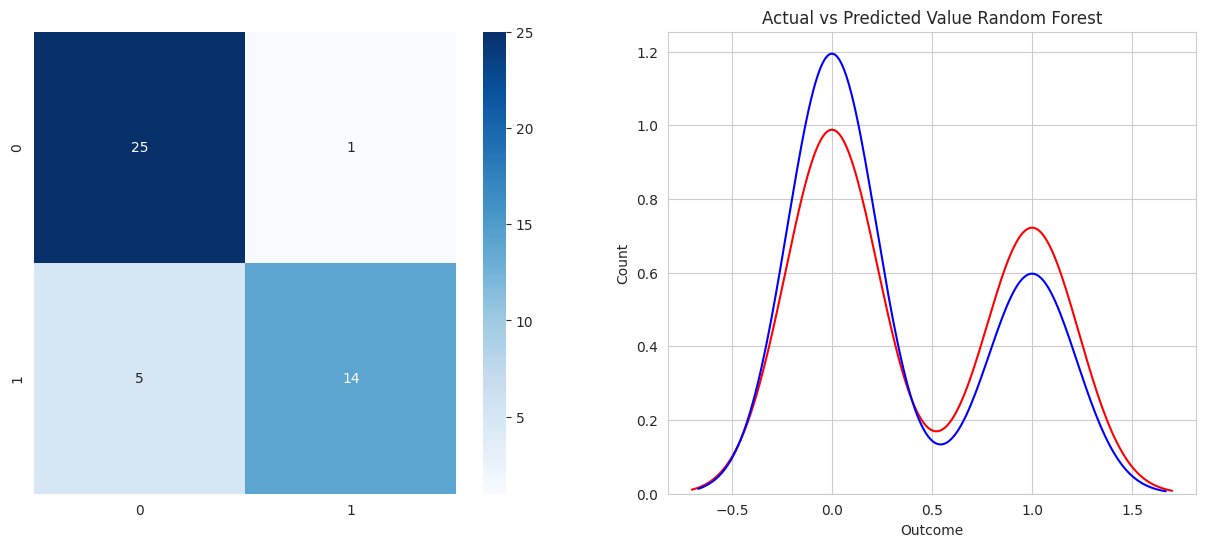

In [ ]:
plot_confusion_matrix(y_test, rf_y_pred, 'Random Forest')

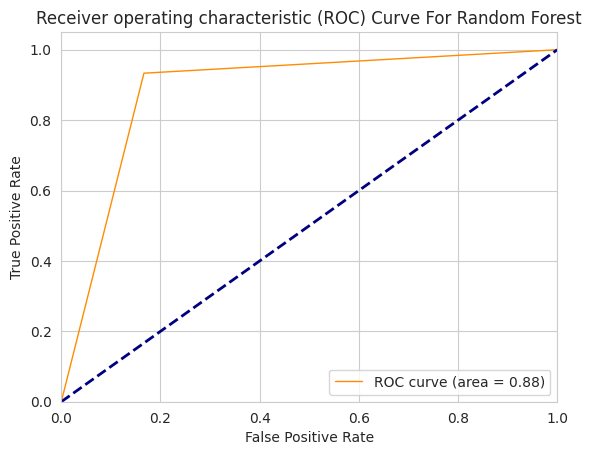

In [ ]:
plot_roc_curve(y_test, rf_y_pred, 'Random Forest')

## SVM

In [ ]:
# Define the SVM model (not using a pipeline)
svm = SVC(probability=True, random_state=42)

# Define the parameter grid to search
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator = svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
svm_best_model = grid_search.best_estimator_

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9238095238095239


In [ ]:
test_accuracy = svm_best_model.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8888888888888888


In [ ]:
svm_y_pred = svm_best_model.predict(X_test_scaled)
svm_y_proba = svm_best_model.predict_proba(X_test_scaled)
report = classification_report(y_test, svm_y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.74      0.85        19

    accuracy                           0.89        45
   macro avg       0.92      0.87      0.88        45
weighted avg       0.91      0.89      0.89        45



In [ ]:
# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)

# Calculate precision
svm_precision = precision_score(y_test, svm_y_pred)

# Calculate recall (sensitivity)
svm_recall = recall_score(y_test, svm_y_pred)

# Calculate F1-score
svm_f1 = f1_score(y_test, svm_y_pred)

acc.append(svm_accuracy)
precision.append(svm_precision)
recall.append(svm_recall)
f1.append(svm_f1)

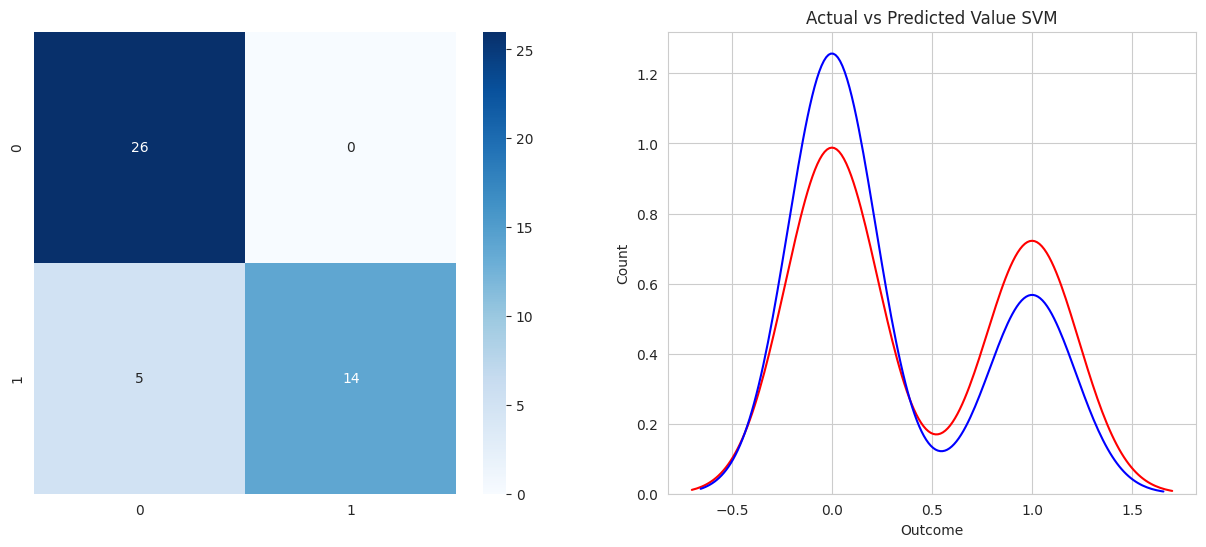

In [ ]:
plot_confusion_matrix(y_test, svm_y_pred, 'SVM')

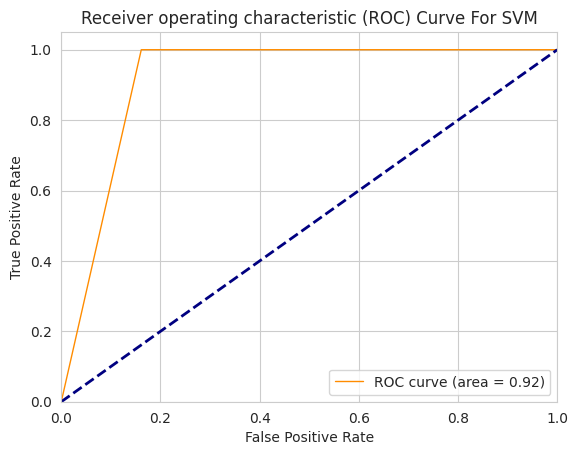

In [ ]:
plot_roc_curve(y_test, svm_y_pred, 'SVM')

## Decision Tree

In [ ]:
# Define the parameter grid for grid search
param_grid = {"criterion": ["gini"], "max_depth": range(2, 10)}
# Instantiate the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(dt_classifier,
                             param_grid,
                             cv=5, # we are taking 5-fold as in k-fold cross validation
                             scoring='accuracy',
                            )

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 2}
Best Accuracy: 0.9142857142857143


In [ ]:
criterion = grid_search.best_params_['criterion']
max_depth = grid_search.best_params_['max_depth']

dt_classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth).fit(X_train_scaled, y_train)

In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = dt_classifier.score(X_train_scaled, y_train)
test_score = dt_classifier.score(X_test_scaled, y_test)
dt_y_pred = dt_classifier.predict(X_test_scaled)
test_recall = recall_score(y_test, dt_y_pred)
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt_y_pred)
test_auc = auc(dt_fpr, dt_tpr)

print("Train accuracy with DecisionTreeClassifier:", train_score)
print("Test accuracy with DecisionTreeClassifier:", test_score)

Train accuracy with DecisionTreeClassifier: 0.9238095238095239
Test accuracy with DecisionTreeClassifier: 0.8888888888888888


In [ ]:
# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Calculate precision
dt_precision = precision_score(y_test, dt_y_pred)

# Calculate recall (sensitivity)
dt_recall = recall_score(y_test, dt_y_pred)

# Calculate F1-score
dt_f1 = f1_score(y_test, dt_y_pred)

acc.append(dt_accuracy)
precision.append(dt_precision)
recall.append(dt_recall)
f1.append(dt_f1)

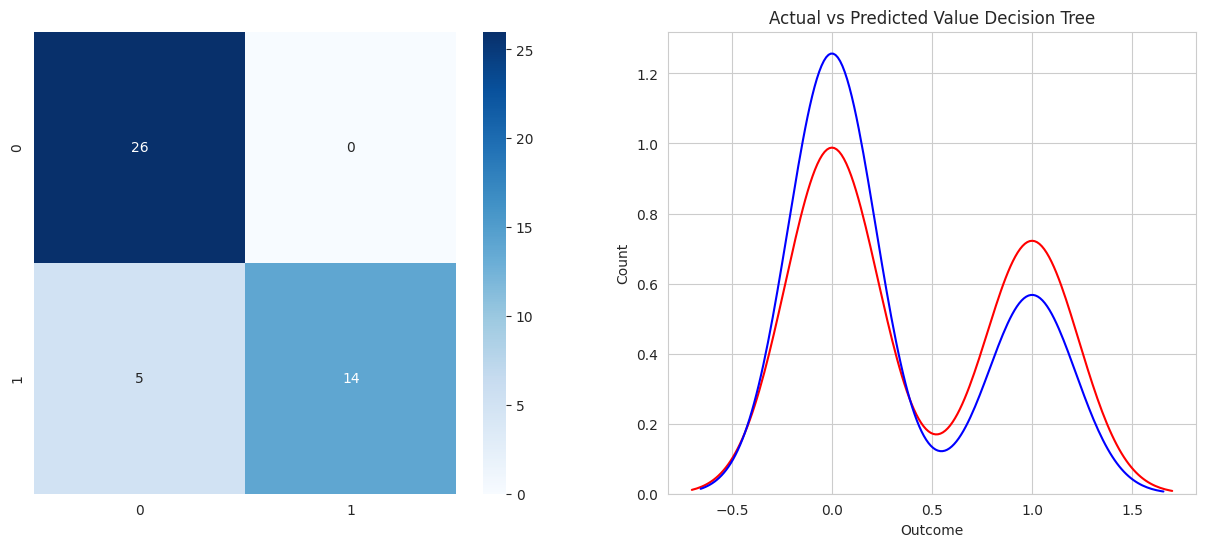

In [ ]:
plot_confusion_matrix(y_test, dt_y_pred, "Decision Tree")

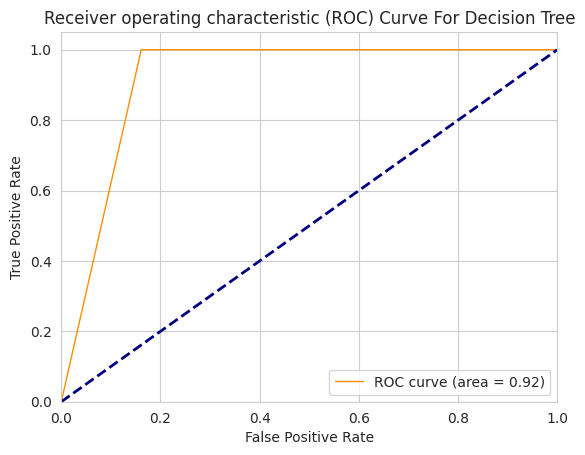

In [ ]:
plot_roc_curve(y_test, dt_y_pred, "Decision Tree")

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.74      0.85        19

    accuracy                           0.89        45
   macro avg       0.92      0.87      0.88        45
weighted avg       0.91      0.89      0.89        45



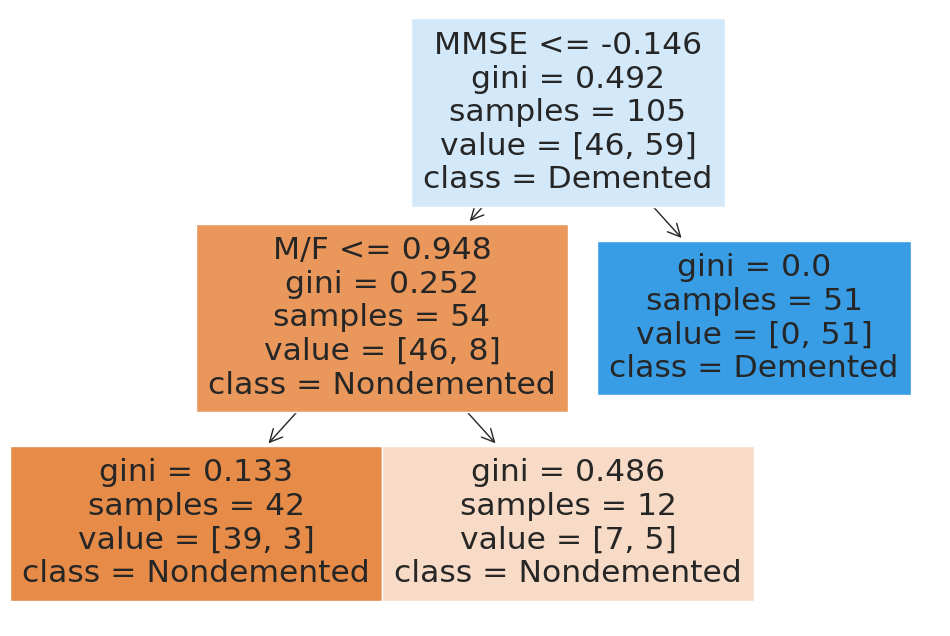

In [ ]:
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=df.columns.tolist(), class_names=['Nondemented', 'Demented'], filled=True)
plt.show()

## Ensemble Learning ( Voting Classifier )

In [ ]:
from sklearn.ensemble import VotingClassifier


# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_best_model),
    ('rf', rf_classifier),
    ('svm', svm_best_model),
    ('dt', dt_classifier)
], voting='soft')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict on the test set
esmble_y_pred = voting_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, esmble_y_pred)
print(f'Voting Classifier Accuracy: {accuracy:.2f}')

Voting Classifier Accuracy: 0.89


In [ ]:
print("Classification Report:")
print(classification_report(y_test, esmble_y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.74      0.85        19

    accuracy                           0.89        45
   macro avg       0.92      0.87      0.88        45
weighted avg       0.91      0.89      0.89        45



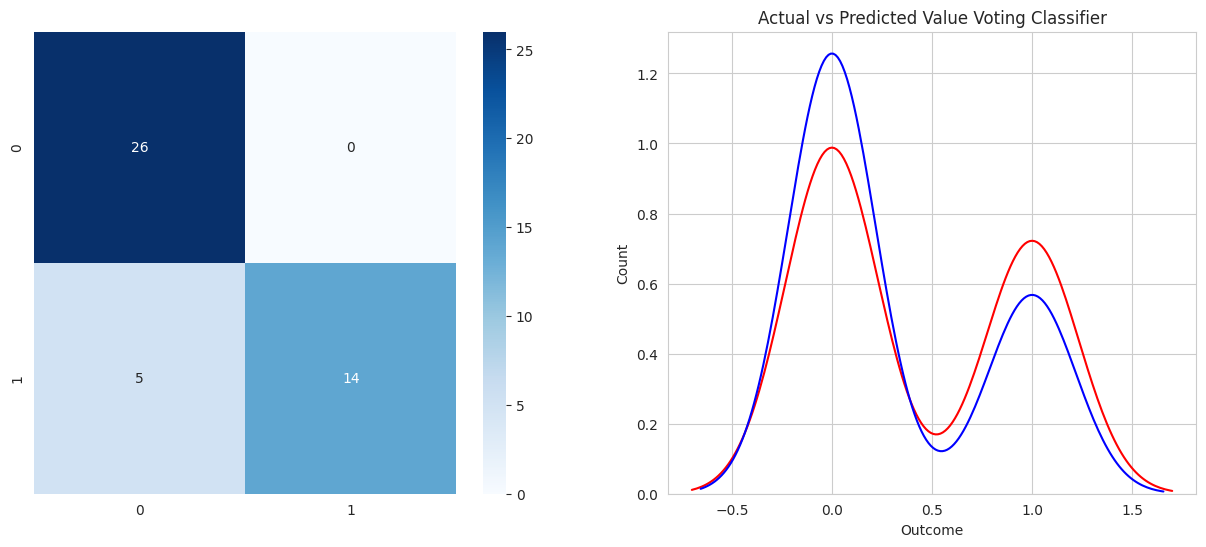

In [ ]:
plot_confusion_matrix(y_test, esmble_y_pred, "Voting Classifier")

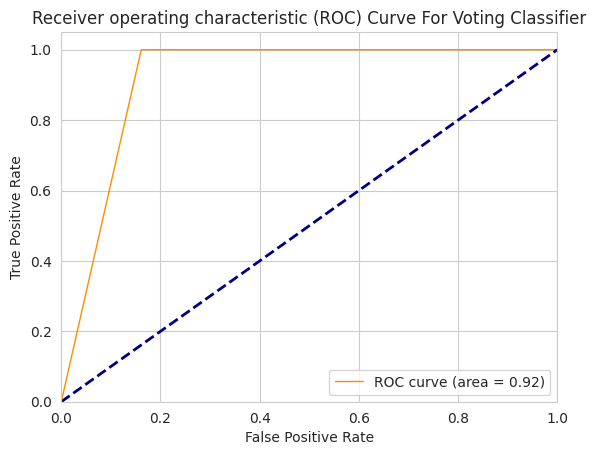

In [ ]:
plot_roc_curve(y_test, esmble_y_pred, "Voting Classifier")

In [ ]:
# Calculate accuracy
esmble_accuracy = accuracy_score(y_test, esmble_y_pred)

# Calculate precision
esmble_precision = precision_score(y_test, esmble_y_pred)

# Calculate recall (sensitivity)
esmble_recall = recall_score(y_test, esmble_y_pred)

# Calculate F1-score
esmble_f1 = f1_score(y_test, esmble_y_pred)

acc.append(esmble_accuracy)
precision.append(esmble_precision)
recall.append(esmble_recall)
f1.append(esmble_f1)

# Model Evaluation


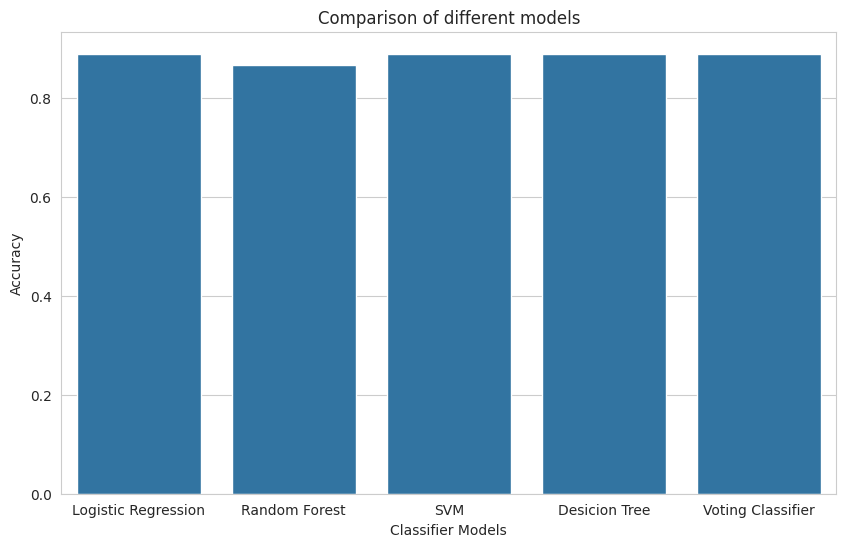

In [ ]:
clfs = ['Logistic Regression','Random Forest','SVM','Desicion Tree','Voting Classifier']
preds = [log_y_pred,rf_y_pred,svm_y_pred,dt_y_pred,esmble_y_pred]
accuracy= []
for i in preds:
    accuracy.append(accuracy_score(y_test, i))
plt.figure(figsize=(10,6))
sns.barplot(x=clfs, y=accuracy)
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models');

In [ ]:
models = pd.DataFrame({
    'Model': ['Logisitic Regression',
              'Random Forest','SVM', 'Decision Tree','Voting Classifier'
              ],
    'Accuracy': [acc[0]*100, acc[1]*100, acc[2]*100, acc[3]*100,acc[4]*100],
    'Precision': [precision[0]*100, precision[1]*100, precision[2]*100, precision[3]*100,precision[4]*100],
    'Recall': [recall[0]*100, recall[1]*100, recall[2]*100, recall[3]*100,recall[4]*100],
    'F1 score':[f1[0]*100, f1[1]*100, f1[2]*100, f1[3]*100,f1[4]*100]
    })
models

,Model,Accuracy,Precision,Recall,F1 score
0,Logisitic Regression,88.888889,100.000000,73.684211,84.848485
1,Random Forest,86.666667,93.333333,73.684211,82.352941
2,SVM,88.888889,100.000000,73.684211,84.848485
3,Decision Tree,88.888889,100.000000,73.684211,84.848485
4,Voting Classifier,88.888889,100.000000,73.684211,84.848485


# TEAM MEMBERS

*   Habiba Mohsen
*   Hana Hesham
*   Malak Nasser
*   Hazem Raafat